# Dataset and Preprocessing

## Initialisation

In [ ]:
!pip install kmodes
!pip install lazypredict

In [ ]:
import io
import time
import pydot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,f1_score,accuracy_score,recall_score,balanced_accuracy_score,max_error, classification_report,confusion_matrix

from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

from kmodes.kmodes import KModes

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# df.to_csv('breast-cancer.csv', index = False)
data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

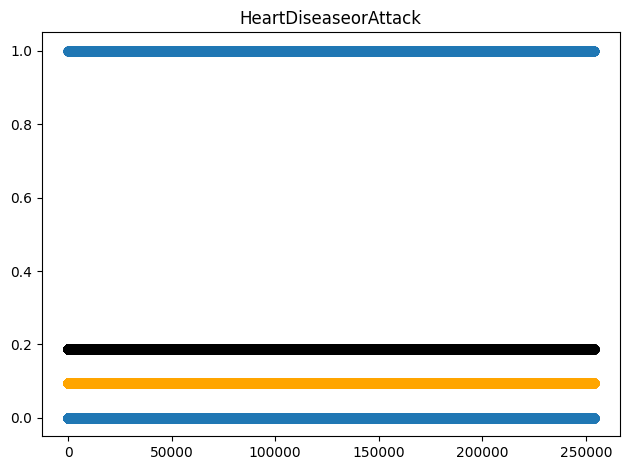

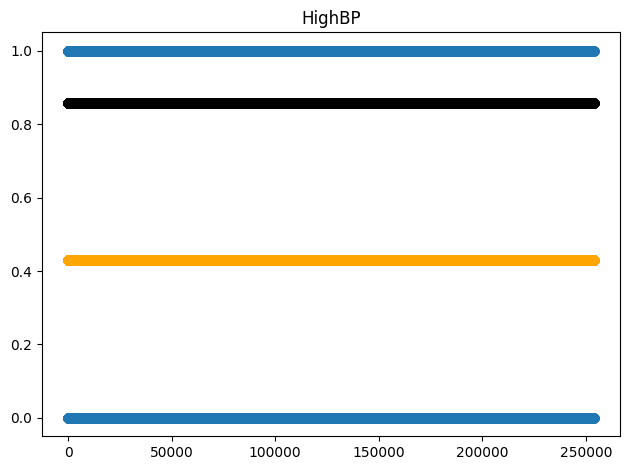

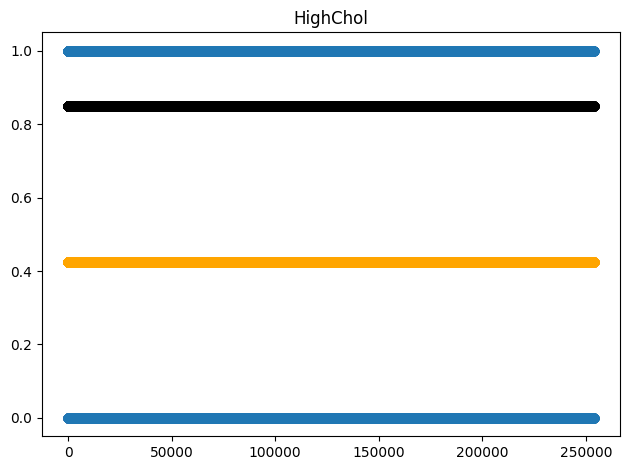

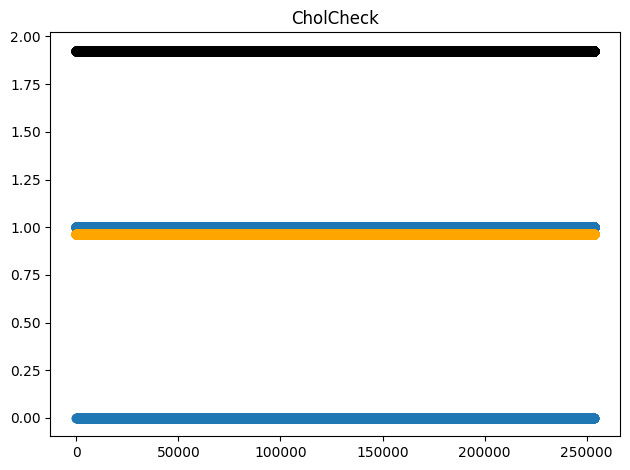

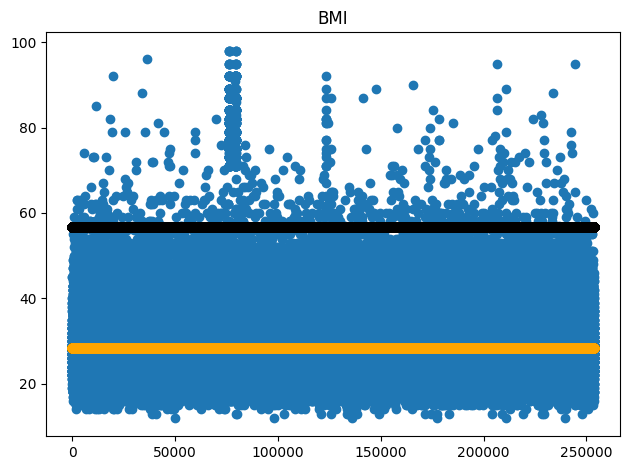

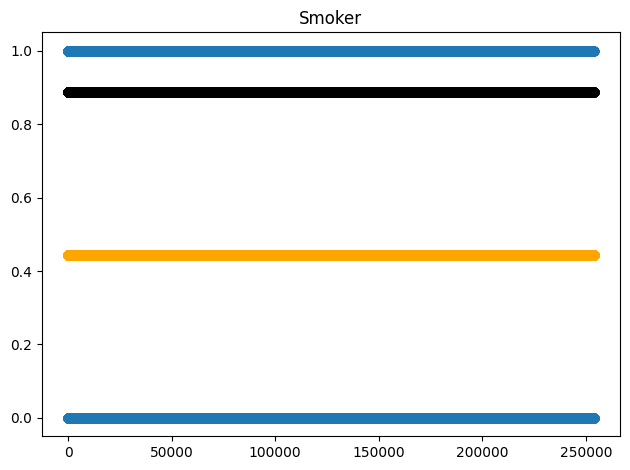

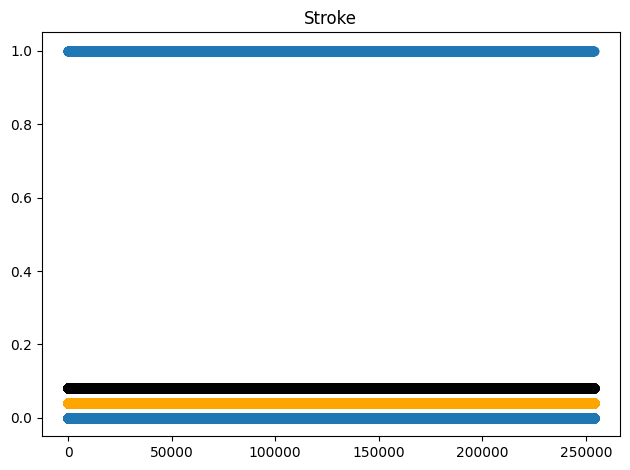

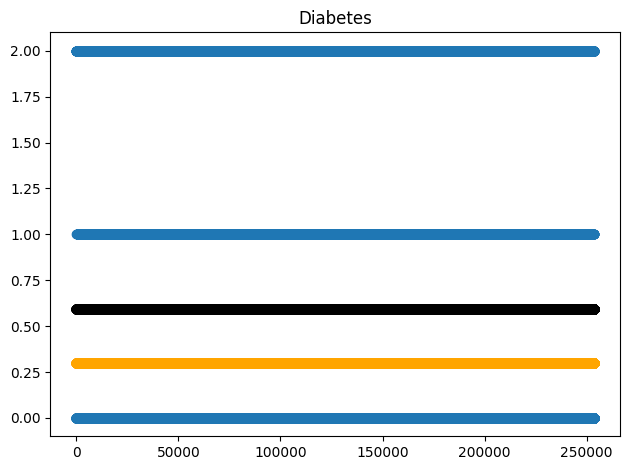

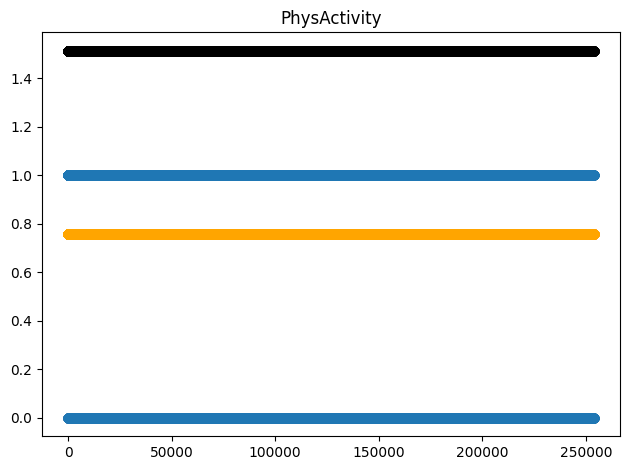

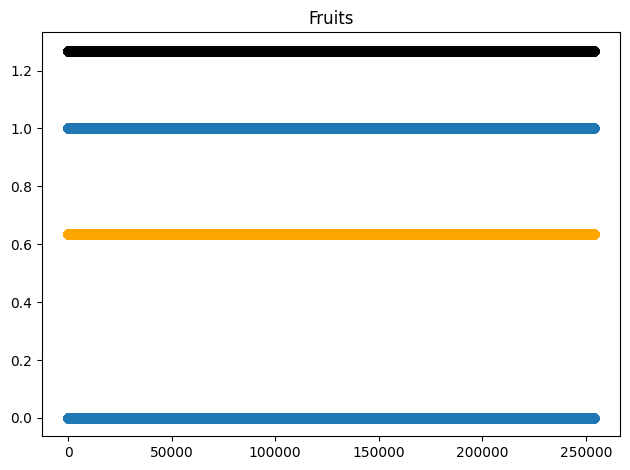

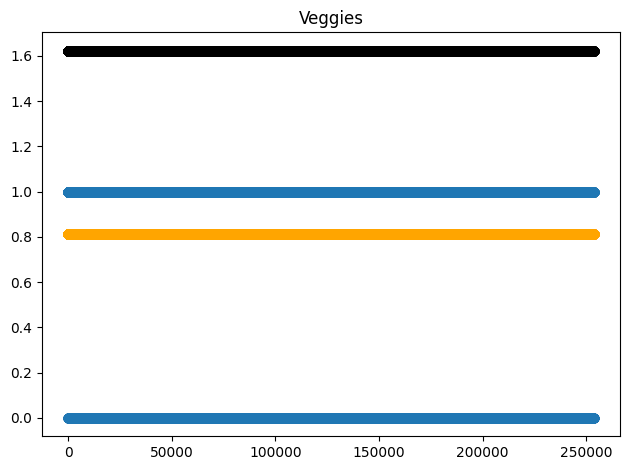

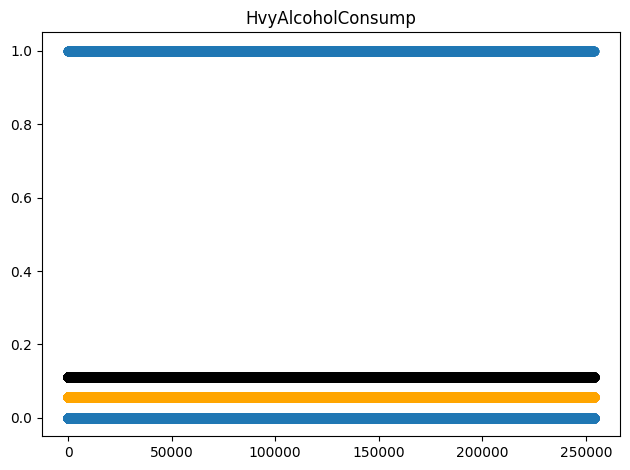

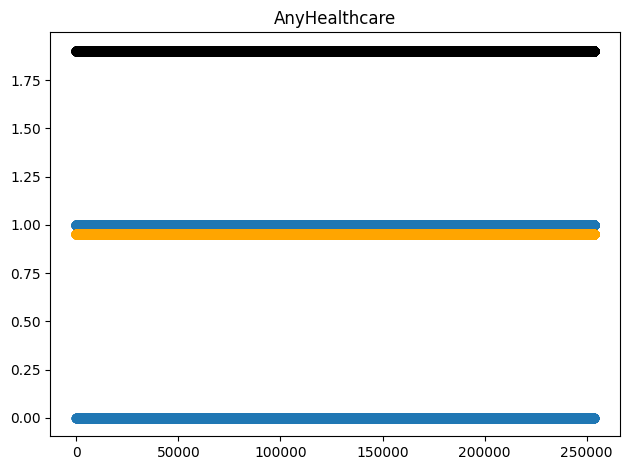

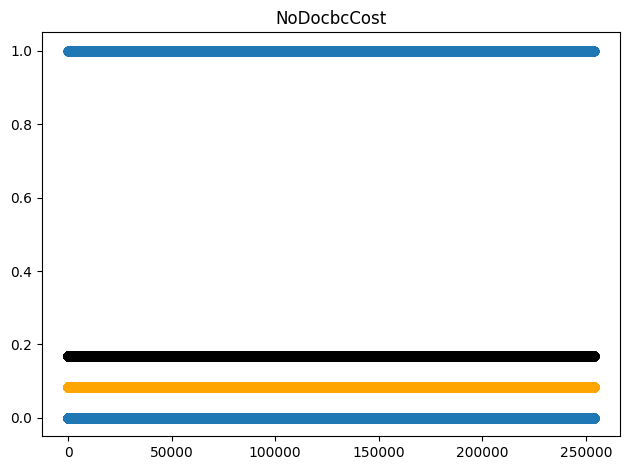

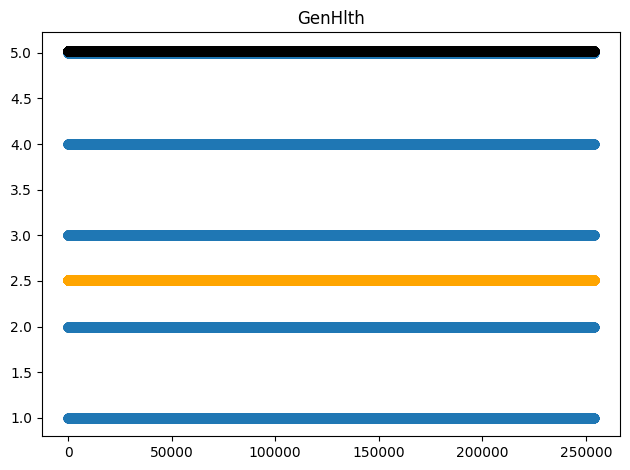

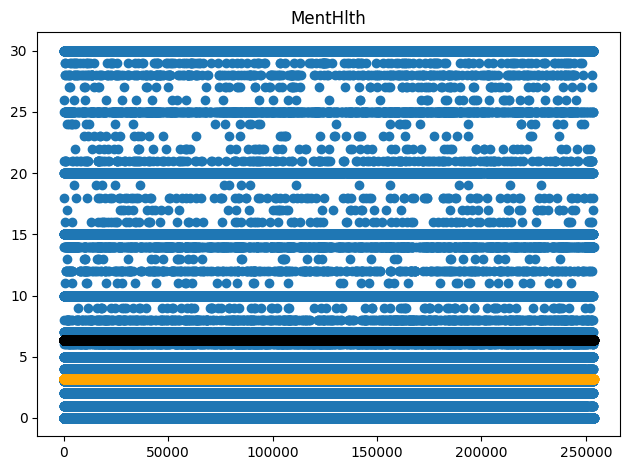

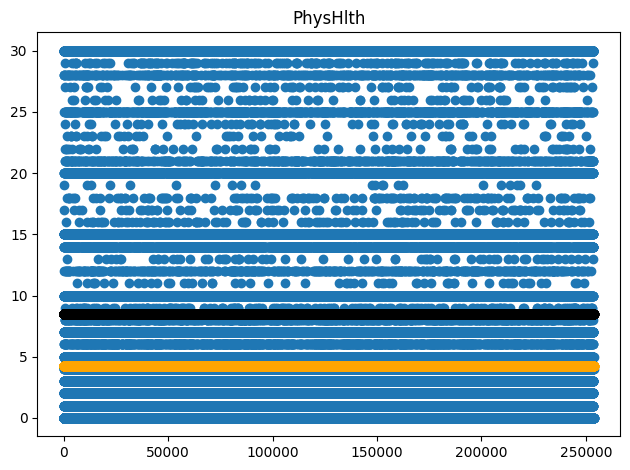

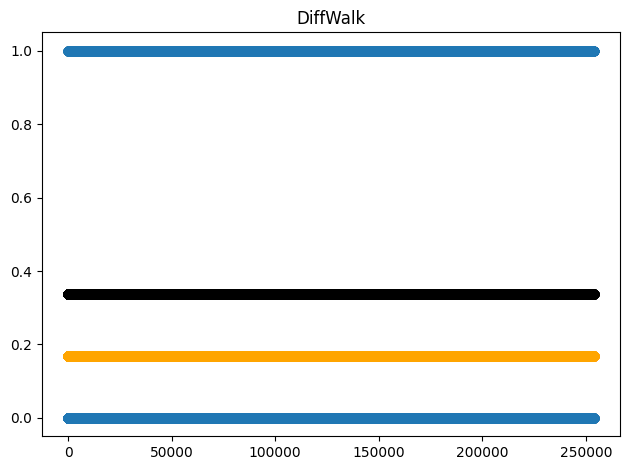

In [ ]:
for i in data.columns:
    plt.scatter([x for x in range(data.shape[0])],data[i])
    plt.scatter([x for x in range(data.shape[0])],[np.mean(data[i]) for x in range(data.shape[0])],color="orange")
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [ ]:
plt.scatter([x for x in range(data.shape[0])],data['BMI'])
plt.scatter([x for x in range(data.shape[0])],[np.mean(data['BMI']) for x in range(data.shape[0])],color="orange")
plt.scatter([x for x in range(data.shape[0])],[2*np.mean(data['BMI']) for x in range(data.shape[0])],color="black")

In [ ]:
data[data['BMI']>2*np.mean(data['BMI'])]=2*np.mean(data['BMI'])

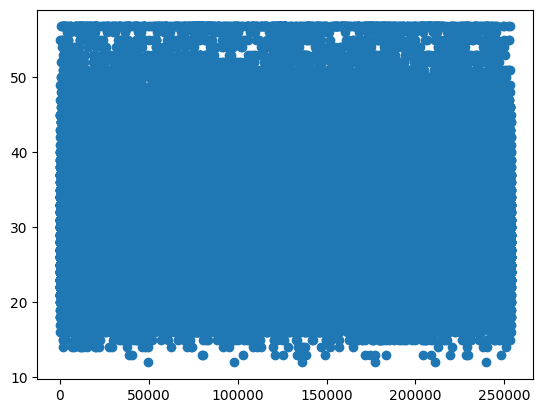

In [ ]:
plt.scatter([x for x in range(data.shape[0])],data['BMI'])

## Data Correlation

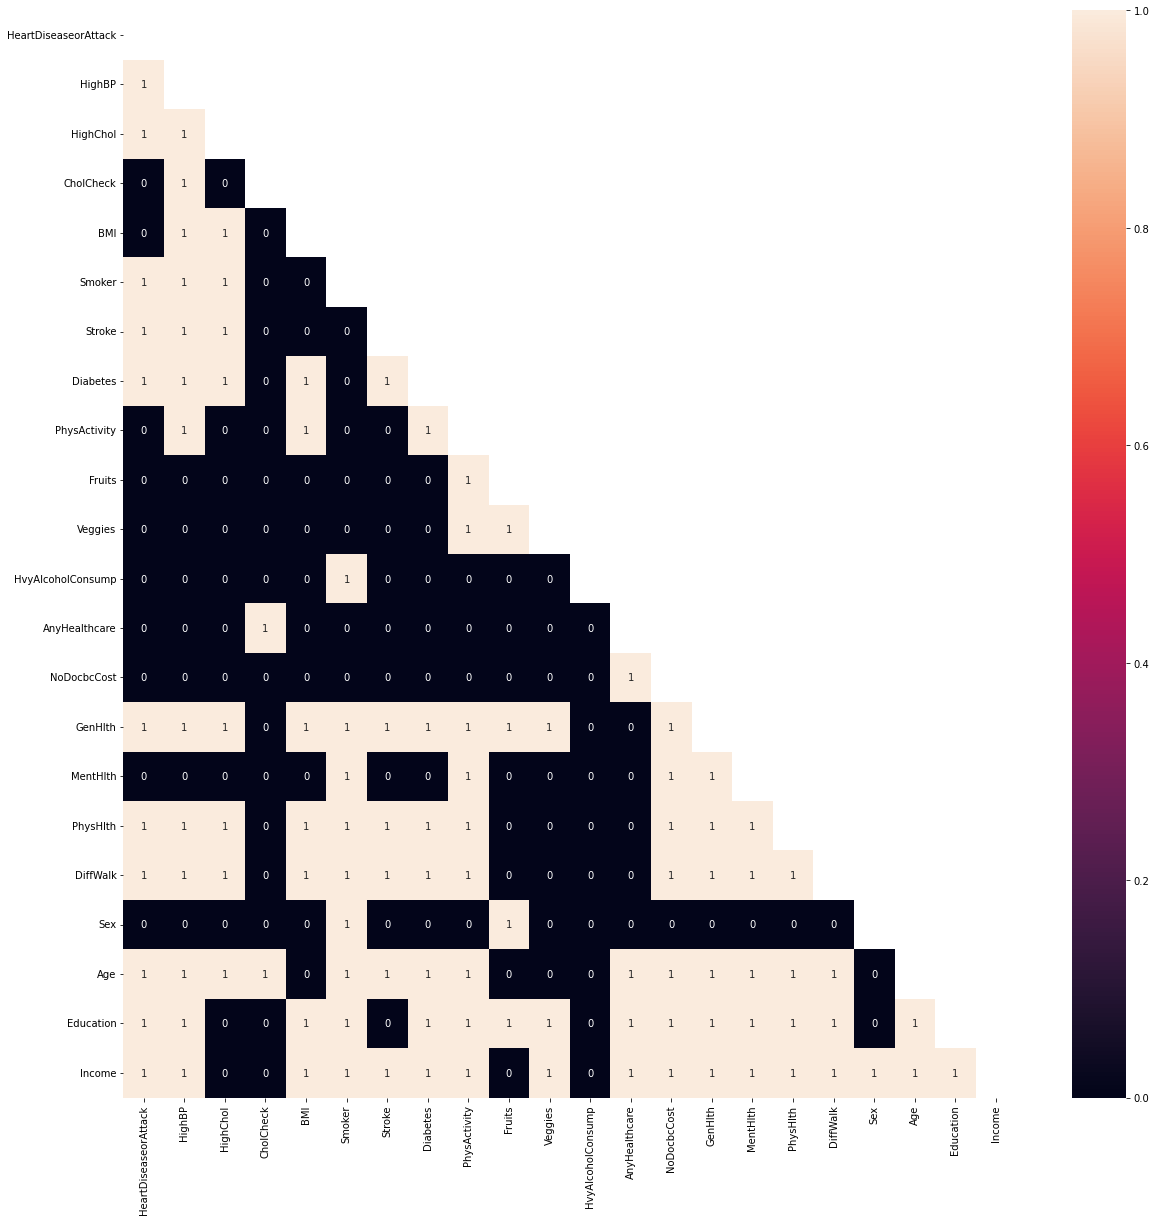

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(abs(data.corr())>0.09,annot=True,mask=np.triu(np.ones_like(data.corr())))
plt.show()

# 'HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education' and 'Income' are having a relationship
# with 'HeartDiseaseorAttack'

## Chi-Square test

In [ ]:
import statsmodels.api as smf

In [ ]:
# Z-score conversion
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier

scaler = StandardScaler()

X = data.drop('HeartDiseaseorAttack',axis=1)
X = scaler.fit_transform(X)
y = data['HeartDiseaseorAttack']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)
# stat, p, dof, expected = chi2_contingency(data)
# chi_scores = chi2(X,y)
# chi_scores

 38%|███▊      | 11/29 [08:08<10:01, 33.44s/it]

In [ ]:
X_opt = np.append(arr = np.ones((X.shape[0],1)).astype(int), values=X, axis=1)

In [ ]:
l=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
regressor_OLS=smf.OLS(endog = y, exog=X_opt[:,l]).fit()
regressor_OLS.summary()
# x20(Education),x15(MentHlth),x8(PhysActivity) need to be dropped as significant level is 0.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     HeartDiseaseorAttack   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.149
Method:                   Least Squares   F-statistic:                     2122.
Date:                  Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                          08:46:29   Log-Likelihood:                -27225.
No. Observations:                253680   AIC:                         5.449e+04
Df Residuals:                    253658   BIC:                         5.472e+04
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0137      0.004     -3.432      0.001      -0.022      -0.006
x1             0.0335      0.001     26.769      0.000       0.031       0.036
x2             0.0386      0.001     32.879      0.000       0.036       0.041
x3             0.0145      0.003      5.040      0.000       0.009       0.020
x4            -0.0083      0.001    -14.326      0.000      -0.009      -0.007
x5             0.0230      0.001     20.465      0.000       0.021       0.025
x6             0.1879      0.003     67.227      0.000       0.182       0.193
x7             0.0239      0.001     28.461      0.000       0.022       0.026
x8             0.0032      0.001      2.361      0.018       0.001       0.006
x9             0.0038      0.001      3.285      0.001       0.002       0.006
x10            0.0035      0.001      2.443      0.015       0.001       0.006
x11           -0.0192      0.002     -8.169      0.000      -0.024      -0.015
x12            0.0080      0.003      3.068      0.002       0.003       0.013
x13            0.0077      0.002      3.732      0.000       0.004       0.012
x14            0.0352      0.001     49.030      0.000       0.034       0.037
x15           -0.0014      0.001     -2.285      0.022      -0.003      -0.000
x16            0.0083      0.001     12.210      0.000       0.007       0.010
x17            0.0186      0.001     28.160      0.000       0.017       0.020
x18            0.0531      0.001     47.762      0.000       0.051       0.055
x19            0.0337      0.001     54.481      0.000       0.033       0.035
x20            0.0010      0.001      1.630      0.103      -0.000       0.002
x21           -0.0073      0.001    -11.146      0.000      -0.009      -0.006
==============================================================================
Omnibus:                   106718.828   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398586.377
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                       7.343   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
l=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21]
regressor_OLS=smf.OLS(endog = y, exog=X_opt[:,l]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     HeartDiseaseorAttack   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.149
Method:                   Least Squares   F-statistic:                     2228.
Date:                  Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                          08:46:45   Log-Likelihood:                -27226.
No. Observations:                253680   AIC:                         5.449e+04
Df Residuals:                    253659   BIC:                         5.471e+04
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0142      0.004     -3.555      0.000      -0.022      -0.006
x1             0.0335      0.001     26.745      0.000       0.031       0.036
x2             0.0386      0.001     32.900      0.000       0.036       0.041
x3             0.0144      0.003      5.033      0.000       0.009       0.020
x4            -0.0083      0.001    -14.369      0.000      -0.009      -0.007
x5             0.0228      0.001     20.403      0.000       0.021       0.025
x6             0.1879      0.003     67.233      0.000       0.182       0.193
x7             0.0239      0.001     28.445      0.000       0.022       0.026
x8             0.0033      0.001      2.503      0.012       0.001       0.006
x9             0.0039      0.001      3.353      0.001       0.002       0.006
x10            0.0037      0.001      2.555      0.011       0.001       0.006
x11           -0.0192      0.002     -8.157      0.000      -0.024      -0.015
x12            0.0083      0.003      3.180      0.001       0.003       0.013
x13            0.0077      0.002      3.745      0.000       0.004       0.012
x14            0.0351      0.001     49.100      0.000       0.034       0.037
x15           -0.0013      0.001     -2.250      0.024      -0.003      -0.000
x16            0.0084      0.001     12.262      0.000       0.007       0.010
x17            0.0186      0.001     28.168      0.000       0.017       0.020
x18            0.0531      0.001     47.747      0.000       0.051       0.055
x19            0.0337      0.001     54.456      0.000       0.032       0.035
x20           -0.0069      0.001    -11.278      0.000      -0.008      -0.006
==============================================================================
Omnibus:                   106719.484   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398586.790
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                       7.343   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
l=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,21]
regressor_OLS=smf.OLS(endog = y, exog=X_opt[:,l]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     HeartDiseaseorAttack   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.149
Method:                   Least Squares   F-statistic:                     2345.
Date:                  Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                          08:46:52   Log-Likelihood:                -27229.
No. Observations:                253680   AIC:                         5.450e+04
Df Residuals:                    253660   BIC:                         5.471e+04
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0142      0.004     -3.561      0.000      -0.022      -0.006
x1             0.0335      0.001     26.744      0.000       0.031       0.036
x2             0.0385      0.001     32.840      0.000       0.036       0.041
x3             0.0145      0.003      5.048      0.000       0.009       0.020
x4            -0.0083      0.001    -14.366      0.000      -0.009      -0.007
x5             0.0227      0.001     20.322      0.000       0.021       0.025
x6             0.1878      0.003     67.217      0.000       0.182       0.193
x7             0.0239      0.001     28.472      0.000       0.022       0.026
x8             0.0034      0.001      2.534      0.011       0.001       0.006
x9             0.0040      0.001      3.400      0.001       0.002       0.006
x10            0.0037      0.001      2.576      0.010       0.001       0.007
x11           -0.0194      0.002     -8.238      0.000      -0.024      -0.015
x12            0.0082      0.003      3.159      0.002       0.003       0.013
x13            0.0073      0.002      3.544      0.000       0.003       0.011
x14            0.0350      0.001     49.125      0.000       0.034       0.036
x15            0.0080      0.001     12.057      0.000       0.007       0.009
x16            0.0186      0.001     28.098      0.000       0.017       0.020
x17            0.0533      0.001     48.019      0.000       0.051       0.055
x18            0.0339      0.001     55.425      0.000       0.033       0.035
x19           -0.0069      0.001    -11.151      0.000      -0.008      -0.006
==============================================================================
Omnibus:                   106714.749   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398514.894
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                       7.342   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
l=[0,1,2,3,4,5,6,7,9,10,11,12,13,14,16,17,18,19,21]
regressor_OLS=smf.OLS(endog = y, exog=X_opt[:,l]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     HeartDiseaseorAttack   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.149
Method:                   Least Squares   F-statistic:                     2475.
Date:                  Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                          08:47:03   Log-Likelihood:                -27232.
No. Observations:                253680   AIC:                         5.450e+04
Df Residuals:                    253661   BIC:                         5.470e+04
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.004     -3.149      0.002      -0.020      -0.005
x1             0.0334      0.001     26.724      0.000       0.031       0.036
x2             0.0385      0.001     32.849      0.000       0.036       0.041
x3             0.0146      0.003      5.097      0.000       0.009       0.020
x4            -0.0084      0.001    -14.585      0.000      -0.010      -0.007
x5             0.0226      0.001     20.259      0.000       0.020       0.025
x6             0.1879      0.003     67.220      0.000       0.182       0.193
x7             0.0239      0.001     28.450      0.000       0.022       0.026
x8             0.0043      0.001      3.653      0.000       0.002       0.007
x9             0.0040      0.001      2.819      0.005       0.001       0.007
x10           -0.0194      0.002     -8.242      0.000      -0.024      -0.015
x11            0.0084      0.003      3.213      0.001       0.003       0.013
x12            0.0073      0.002      3.561      0.000       0.003       0.011
x13            0.0348      0.001     49.088      0.000       0.033       0.036
x14            0.0079      0.001     11.933      0.000       0.007       0.009
x15            0.0184      0.001     27.984      0.000       0.017       0.020
x16            0.0534      0.001     48.137      0.000       0.051       0.056
x17            0.0339      0.001     55.367      0.000       0.033       0.035
x18           -0.0068      0.001    -11.026      0.000      -0.008      -0.006
==============================================================================
Omnibus:                   106719.053   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398543.443
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                       7.342   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# KNN

## Data Preprocessing using KModes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
cols = data.columns
data[cols] = mmscaler.fit_transform(data[cols])

In [ ]:
MyData = data.sample(frac=0.7)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1338555.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1338555.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1338555.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1338555.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1338555.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21033, cost: 1196716.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 39366, cost: 1258562.0
Init: initializing centroids
Init: initializing clust

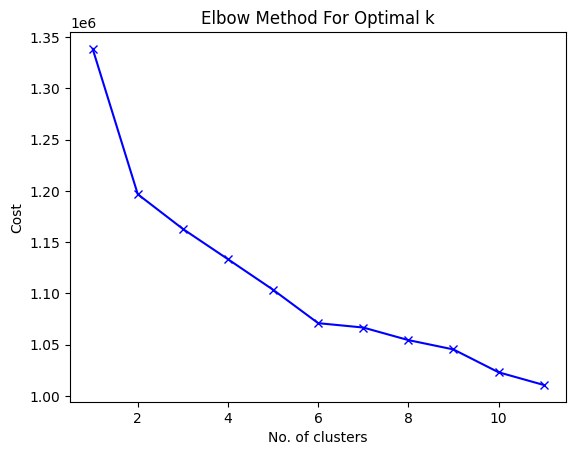

In [ ]:
# Elbow curve to find optimal K
cost = []
time_arr = []
K = range(1,12)
cols=MyData.columns
for num_clusters in list(K):
    start=time.time()
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    clusters=kmode.fit_predict(MyData[cols])
    MyData.insert(0,"Cluster"+str(num_clusters), clusters, True)
    end=time.time()
    cost.append(kmode.cost_)
    time_arr.append(end-start)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

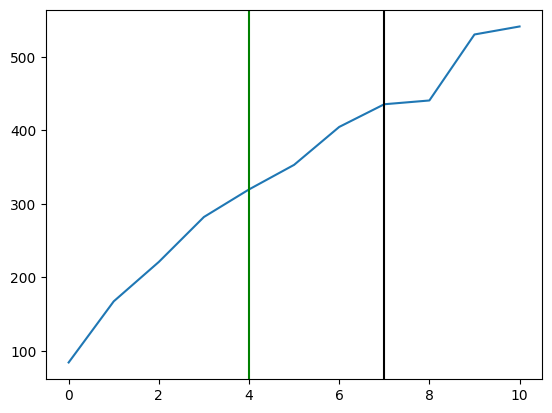

In [ ]:
plt.plot(time_arr)
plt.axvline(x = 4, color = 'green', label = 'x = 4')
plt.axvline(x = 7, color = 'black', label = 'x = 7')

In [ ]:
sns.color_palette("hls", 8)
for cols in MyData.columns:
    plt.figure(figsize=(15,4))
    sns.color_palette("tab10")
    sns.countplot(data = MyData,x = cols , hue = "Cluster4")
    plt.show()

In [ ]:
for cols in MyData.columns:
    plt.figure(figsize=(15,4))
    sns.color_palette("tab10")
    sns.countplot(data = MyData, x = cols , hue = "Cluster11")
    #sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)
    plt.show()

## MLP Classifier to predict cluster (Wellness Class)

In [ ]:
target_columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9','Cluster10','Cluster11']
accuracy_scores = []
time_arr = []
predictors = data.columns
encoder = preprocessing.OneHotEncoder(sparse_output=False)
X = MyData[predictors].values
X_encoded = encoder.fit_transform(X)

for target_column in target_columns:
    y = MyData[target_column].values
    y_encoded = encoder.fit_transform(y.reshape(-1, 1))

    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(20,15,10), activation='relu', solver='adam', max_iter=500, validation_fraction=0.2).fit(X_train,y_train)
    end = time.time()

    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,predict_test))
    time_arr.append(end-start)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


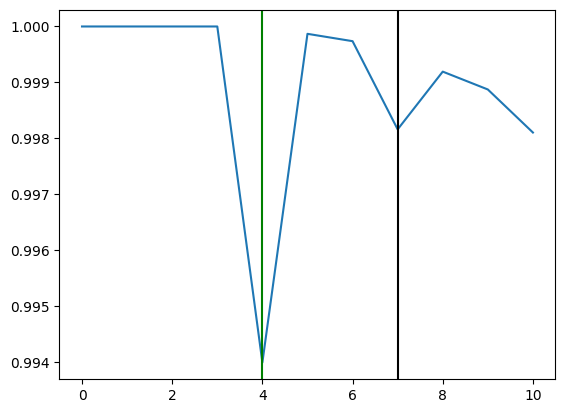

In [ ]:
plt.plot(accuracy_scores)
plt.axvline(x = 4, color = 'green', label = 'x = 4')
plt.axvline(x = 7, color = 'black', label = 'x = 7')

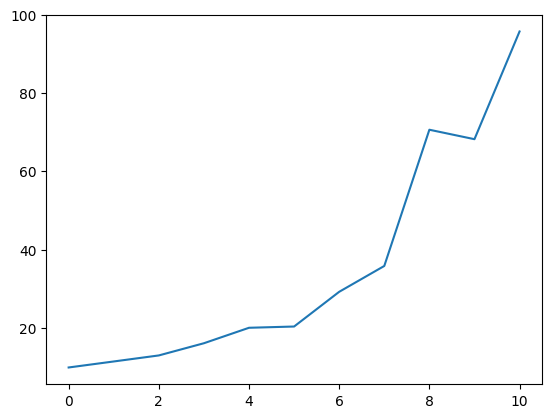

In [ ]:
plt.plot(time_arr)

# PCA


In [ ]:
df=pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
X = df.iloc[:,1:22]
y=df.iloc[:,0]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

X_scaled

array([[1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.08333333, 0.8       ,
        0.14285714],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.8       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.14285714]])

In [ ]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[18.18850974 11.29364725 10.51486463  9.27208181  7.63235486  6.63842631
  5.54106993  5.18655801  4.05025437  3.69025726  2.84921131  2.47847482
  2.08008725  1.92794536  1.69758539  1.55268509  1.46417574  1.35570579
  1.32915461  1.05332206  0.20362841]



In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 18.18850974  29.48215699  39.99702161  49.26910342  56.90145828
  63.53988459  69.08095452  74.26751254  78.3177669   82.00802416
  84.85723547  87.33571029  89.41579754  91.3437429   93.04132829
  94.59401338  96.05818913  97.41389492  98.74304953  99.79637159
 100.        ]



Text(0, 0.5, 'Explained variance (%)')

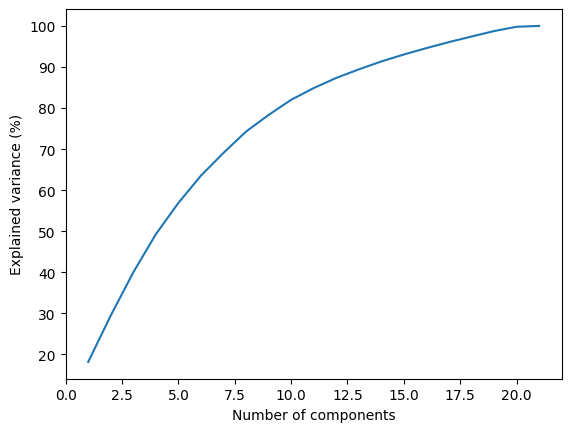

In [ ]:
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[18.18850974 29.48215699 39.99702161 49.26910342 56.90145828 63.53988459
 69.08095452 74.26751254 78.3177669  82.00802416]
Number of components: 10


Text(0, 0.5, 'Explained variance (%)')

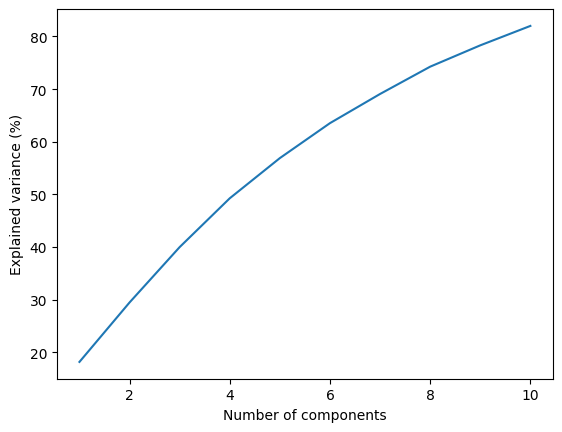

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

[[5.00067129e-01 4.26674507e-01 2.48044784e-02 3.14319606e-02
  2.93778646e-01 6.61582413e-02 2.36868830e-01 2.81852814e-01
  1.97261454e-01 1.48241294e-01 3.15380891e-03 3.09144687e-03
  5.68640980e-02 2.42817160e-01 9.58995729e-02 2.02094888e-01
  3.10155210e-01 5.36119364e-02 1.49569421e-01 1.01203645e-01
  1.87681442e-01]
 [1.92388624e-01 1.92343832e-01 3.16186541e-02 1.11932451e-03
  3.22425128e-01 1.89827769e-02 7.21954423e-02 3.93304470e-02
  5.53061701e-01 2.33848070e-01 3.32418893e-02 2.84025227e-02
  5.55172837e-03 3.98213752e-02 2.23975503e-02 6.26458592e-02
  1.21565553e-01 6.45949435e-01 9.88749530e-02 1.44842452e-02
  5.81427997e-02]
 [3.03389769e-01 3.90128383e-01 2.69750185e-02 3.91329012e-03
  1.50383773e-02 7.11258253e-03 4.41032082e-02 3.52409986e-01
  3.64396857e-01 2.08589257e-01 2.55225858e-03 4.59639485e-02
  1.04771913e-01 9.87844955e-02 1.20305383e-01 1.41850599e-01
  1.99937276e-01 5.52990258e-01 9.47775053e-02 7.74371628e-02
  1.84662425e-01]
 [1.67719695e-01

In [ ]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]

    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['HeartDiseaseorAttack', 'HighBP', 'PhysHlth', 'BMI']
Component 1: ['DiffWalk', 'PhysActivity', 'BMI', 'Fruits']
Component 2: ['DiffWalk', 'HighBP', 'PhysActivity', 'Diabetes']
Component 3: ['BMI', 'PhysActivity', 'Fruits', 'HighBP']
Component 4: ['HighBP', 'DiffWalk', 'PhysActivity', 'Diabetes']
Component 5: ['HeartDiseaseorAttack', 'HighBP', 'Diabetes', 'PhysActivity']
Component 6: ['Diabetes', 'PhysHlth', 'MentHlth', 'NoDocbcCost']
Component 7: ['Fruits', 'PhysActivity', 'Diabetes', 'Education']
Component 8: ['Stroke', 'AnyHealthcare', 'HeartDiseaseorAttack', 'GenHlth']
Component 9: ['AnyHealthcare', 'PhysHlth', 'Education', 'HvyAlcoholConsump']


In [ ]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(253680, 10)
[[ 1.58826607 -0.1714319   0.71770994 ... -0.54638547 -0.44593293
  -0.22716062]
 [-0.04435574  0.64279379  1.08957972 ...  0.71335366 -0.25815039
   1.01279667]
 [ 1.30329461 -0.81721758  0.66831231 ...  0.52082805 -0.80585016
   0.10309482]
 ...
 [-0.75975052 -0.21488999  0.54185233 ...  0.98564156 -0.0068869
   0.16635165]
 [ 0.13625343 -0.02519642 -0.13465252 ... -0.15938956 -0.23015071
   0.38319266]
 [ 0.53047587 -0.74230809 -0.24198373 ...  0.97242776  0.6418611
   0.30534252]]


# Logistic Regression

## Without feature selection

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# y = MyData['Cluster4'].values
# y_encoded = encoder.fit_transform(y.reshape(-1, 1))

start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg.fit(X_train, y_train)
end = time.time()

y_pred = log_reg.predict(X_test)
accuracy=(accuracy_score(y_test, y_pred))
time=(end-start)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Time taken',time,'s')
print('Accuracy',accuracy)

Time taken 3.0169870853424072 s
Accuracy 0.907954903815831


## With reduction of features (PCA)

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

start = time.time()
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X_pca, y,test_size=0.2,random_state=4,stratify=y)
log_reg.fit(X_train, y_train)
end = time.time()

y_pred = log_reg.predict(X_test)
accuracy=(accuracy_score(y_test, y_pred))
time=(end-start)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Time taken',time,'s')
print('Accuracy',accuracy)

Time taken 2.4866256713867188 s
Accuracy 0.907954903815831


## With reduction of features (Chi-square)

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# y = MyData['Cluster4'].values
# y_encoded = encoder.fit_transform(y.reshape(-1, 1))

X_reduced=X.drop('Education',axis=1)
X_reduced=X_reduced.drop('MentHlth',axis=1)
X_reduced=X_reduced.drop('PhysActivity',axis=1)

start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)
log_reg.fit(X_train, y_train)
end = time.time()

y_pred = log_reg.predict(X_test)
accuracy=(accuracy_score(y_test, y_pred))
time=(end-start)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:450: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  opt_res = optimize.minimize(


In [ ]:
print('Time taken',time,'s')
print('Accuracy',accuracy)

Time taken 2.789372205734253 s
Accuracy 0.9073898875223378


## With reduction of features (Data Correlation)

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

X_r=X.drop('Sex',axis=1)
X_r=X_r.drop('MentHlth',axis=1)
X_r=X_r.drop('PhysActivity',axis=1)
X_r=X_r.drop('Fruits',axis=1)
X_r=X_r.drop('Veggies',axis=1)
X_r=X_r.drop('HvyAlcoholConsump',axis=1)
X_r=X_r.drop('AnyHealthcare',axis=1)
X_r=X_r.drop('NoDocbcCost',axis=1)
X_r=X_r.drop('CholCheck',axis=1)
X_r=X_r.drop('BMI',axis=1)

start = time.time()
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X_r,y,test_size=0.2,random_state=4,stratify=y)
log_reg.fit(X_train, y_train)
end = time.time()

y_pred = log_reg.predict(X_test)
accuracy=(accuracy_score(y_test, y_pred))
time=(end-start)

In [ ]:
print('Time taken',time,'s')
print('Accuracy',accuracy)

Time taken 2.592489719390869 s
Accuracy 0.9073898875223378


# Fitting Neural Network to the dataset

## Without any feature selection

In [ ]:
import time
t1 = time.time()

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50) ,activation = 'relu',solver='lbfgs',random_state=1)
#Fitting the training data to the network
classifier.fit(X_train, y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)

t2 = time.time()
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:528: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  opt_res = scipy.optimize.minimize(


array([[45512,  4294],
       [  445,   485]])

In [ ]:
correct_ones=accuracy_score(y_test, y_pred.round(), normalize=False)
print("Accuracy is: ",correct_ones/X_test.shape[0])
print('Time taken',t2-t1,'s')

Accuracy is:  0.9043479974771366
Time taken 599.7906012535095 s


## With reduction of features (Chi-square)

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

X_reduced=X.drop('Education',axis=1)
X_reduced=X_reduced.drop('MentHlth',axis=1)
X_reduced=X_reduced.drop('PhysActivity',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)
t1 = time.time()

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50) ,activation = 'relu',solver='lbfgs',random_state=1)
#Fitting the training data to the network
classifier.fit(X_train, y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)

t2 = time.time()
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:528: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  opt_res = scipy.optimize.minimize(


array([[68267,  6385],
       [  669,   783]])

In [ ]:
correct_ones=accuracy_score(y_test, y_pred.round(), normalize=False)
print("Accuracy is: ",correct_ones/X_test.shape[0])
print('Time taken',t2-t1,'s')

Accuracy is:  0.9073110480395249
Time taken 400.46728444099426 s


# With PCA


In [ ]:
import time
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)
t1 = time.time()

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50) ,activation = 'relu',solver='lbfgs',random_state=1)
#Fitting the training data to the network
classifier.fit(X_train, y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)

t2 = time.time()
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[68346,  6530],
       [  590,   638]])

In [ ]:
correct_ones=accuracy_score(y_test, y_pred.round(), normalize=False)
print("Accuracy is: ",correct_ones/X_test.shape[0])
print('Time taken',t2-t1,'s')

Accuracy is:  0.906443813728582
Time taken 655.2966067790985 s


## With reduction of features (Data Correlation)

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

X_r=X.drop('Sex',axis=1)
X_r=X_r.drop('MentHlth',axis=1)
X_r=X_r.drop('PhysActivity',axis=1)
X_r=X_r.drop('Fruits',axis=1)
X_r=X_r.drop('Veggies',axis=1)
X_r=X_r.drop('HvyAlcoholConsump',axis=1)
X_r=X_r.drop('AnyHealthcare',axis=1)
X_r=X_r.drop('NoDocbcCost',axis=1)
X_r=X_r.drop('CholCheck',axis=1)
X_r=X_r.drop('BMI',axis=1)
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X_r,y,test_size=0.2,random_state=4,stratify=y)

t1 = time.time()

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50) ,activation = 'relu',solver='lbfgs',random_state=1)
#Fitting the training data to the network
classifier.fit(X_train, y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)

t2 = time.time()
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:528: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  opt_res = scipy.optimize.minimize(


array([[68267,  6385],
       [  669,   783]])

In [ ]:
correct_ones=accuracy_score(y_test, y_pred.round(), normalize=False)
print("Accuracy is: ",correct_ones/X_test.shape[0])
print('Time taken',t2-t1,'s')

Accuracy is:  0.9073110480395249
Time taken 397.55130529403687 s


# SVM

## Without feature selection

In [ ]:
t1 = time.time()

from sklearn.svm import SVC

# y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y_encoded)

SupportVectorClassModel = SVC(kernel='linear')
SupportVectorClassModel.fit(X_train,y_train)
y_pred = SupportVectorClassModel.predict(X_test)
t2 = time.time()

time = t2-t1
accuracy_score(y_test,y_pred)

0.9058065279091769

In [ ]:
print('Time taken',time,'s')

Time taken 3401.677722930908 s


# With PCA

In [ ]:
import time
start = time.time()
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

SupportVectorClassModel = SVC(kernel='linear')
SupportVectorClassModel.fit(X_train,y_train)
y_pred = SupportVectorClassModel.predict(X_test)
end = time.time()

time = end-start
accuracy_score(y_test,y_pred)

0.905813097866078

In [ ]:
print('Time taken',time,'s')

Time taken 325.9306116104126 s


## With reduction of features (Chi-square)

In [ ]:
import time
start = time.time()

X_reduced=X.drop('Education',axis=1)
X_reduced=X_reduced.drop('MentHlth',axis=1)
X_reduced=X_reduced.drop('PhysActivity',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)

SupportVectorClassModel = SVC(kernel='linear')
SupportVectorClassModel.fit(X_train,y_train)
y_pred = SupportVectorClassModel.predict(X_test)
end = time.time()

time = end-start
accuracy_score(y_test,y_pred)

0.905813097866078

In [ ]:
print('Time taken',time,'s')

Time taken 2357.755462884903 s


## With reduction of features (Data Correlation)

In [ ]:
import time
start = time.time()

X_r=X.drop('Sex',axis=1)
X_r=X_r.drop('MentHlth',axis=1)
X_r=X_r.drop('PhysActivity',axis=1)
X_r=X_r.drop('Fruits',axis=1)
X_r=X_r.drop('Veggies',axis=1)
X_r=X_r.drop('HvyAlcoholConsump',axis=1)
X_r=X_r.drop('AnyHealthcare',axis=1)
X_r=X_r.drop('NoDocbcCost',axis=1)
X_r=X_r.drop('CholCheck',axis=1)
X_r=X_r.drop('BMI',axis=1)
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X_r,y,test_size=0.2,random_state=4,stratify=y)

SupportVectorClassModel = SVC(kernel='linear')
SupportVectorClassModel.fit(X_train,y_train)
y_pred = SupportVectorClassModel.predict(X_test)
end = time.time()

time = end-start
accuracy_score(y_test,y_pred)

0.905813097866078

In [ ]:
print('Time taken',time,'s')

Time taken 1647.6126391887665 s


# Fitting Random Forest Regression to the dataset

##Without any reduction of features

In [ ]:
t1 = time.time()
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on training data
rf.fit(X_train, y_train)
t2 = time.time()

In [ ]:
y_pred=rf.predict(X_test)
cnm=confusion_matrix(y_test,y_pred.round())

cnm

array([[44850,  1107],
       [ 4045,   734]])

In [ ]:
correct_ones=accuracy_score(y_test, y_pred.round(), normalize=False)
correct_ones

45584

In [ ]:
print('The shape of our features is:', X_test.shape)
print('Time taken',t2-t1,'s')

The shape of our features is: (50736, 21)
Time taken 63.78623676300049 s


In [ ]:
print("Accuracy is: ",correct_ones/X_test.shape[0])

Accuracy is:  0.8984547461368654


In [ ]:
classification_report(y_test,y_pred.round())

'              precision    recall  f1-score   support\n\n         0.0       0.92      0.98      0.95     45957\n         1.0       0.40      0.15      0.22      4779\n\n    accuracy                           0.90     50736\n   macro avg       0.66      0.56      0.58     50736\nweighted avg       0.87      0.90      0.88     50736\n'

##With reduction of features (Chi-square)



In [ ]:
t1 = time.time()
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
X_reduced=X.drop('Education',axis=1)
X_reduced=X_reduced.drop('MentHlth',axis=1)
X_reduced=X_reduced.drop('PhysActivity',axis=1)

X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced=train_test_split(X_reduced,y,test_size=0.2,random_state=4,stratify=y)

# Train the model on training data
rf.fit(X_train_reduced, y_train_reduced)
t2 = time.time()

In [ ]:
y_pred_reduced=rf.predict(X_test_reduced)
cnm=confusion_matrix(y_test_reduced,y_pred_reduced.round())

cnm

array([[44529,  1428],
       [ 3984,   795]])

In [ ]:
correct_ones=accuracy_score(y_test_reduced, y_pred_reduced.round(), normalize=False)
correct_ones

45324

In [ ]:
print("Accuracy is: ",correct_ones/X_test_reduced.shape[0])
print('Time taken',t2-t1,'s')

Accuracy is:  0.8933301797540208
Time taken 51.892621994018555 s


# With PCA

In [ ]:
import time
t1 = time.time()
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced=train_test_split(X_pca,y,test_size=0.2,random_state=4,stratify=y)

# Train the model on training data
rf.fit(X_train_reduced, y_train_reduced)
t2 = time.time()

In [ ]:
y_pred_reduced=rf.predict(X_test_reduced)
cnm=confusion_matrix(y_test_reduced,y_pred_reduced.round())

cnm

array([[44826,  1131],
       [ 4147,   632]])

In [ ]:
correct_ones=accuracy_score(y_test_reduced, y_pred_reduced.round(), normalize=False)
correct_ones

45458

In [ ]:
print("Accuracy is: ",correct_ones/X_test_reduced.shape[0])
print('Time taken',t2-t1,'s')

Accuracy is:  0.8959713024282561
Time taken 385.031466960907 s


## With reduction of features (Data Correlation)

In [ ]:
t1 = time.time()
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'CholCheck', 'BMI'
X_r=X.drop('Sex',axis=1)
X_r=X_r.drop('MentHlth',axis=1)
X_r=X_r.drop('PhysActivity',axis=1)
X_r=X_r.drop('Fruits',axis=1)
X_r=X_r.drop('Veggies',axis=1)
X_r=X_r.drop('HvyAlcoholConsump',axis=1)
X_r=X_r.drop('AnyHealthcare',axis=1)
X_r=X_r.drop('NoDocbcCost',axis=1)
X_r=X_r.drop('CholCheck',axis=1)
X_r=X_r.drop('BMI',axis=1)
X_train_r,X_test_r,y_train_r,y_test_r=train_test_split(X_r,y,test_size=0.2,random_state=4,stratify=y)
# Train the model on training data
rf.fit(X_train_r, y_train_r)
t2 = time.time()

In [ ]:
y_pred_r=rf.predict(X_test_r)
cnm=confusion_matrix(y_test_r,y_pred_r.round())

cnm

array([[44394,  1563],
       [ 3940,   839]])

In [ ]:
correct_ones=accuracy_score(y_test_r, y_pred_r.round(), normalize=False)
correct_ones

45233

In [ ]:
print("Accuracy is: ",correct_ones/X_test_r.shape[0])
print('Time taken',t2-t1,'s')

Accuracy is:  0.8915365815200252
Time taken 34.76019334793091 s


## Miscellaneous




In [ ]:
# mape = 100 * (errors / test_labels)
# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Import tools needed for visualization
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Export the image to a dot file

In [ ]:
# rf_small = RandomForestRegressor(n_estimators=10, max_depth=3)
# rf_small.fit(train_features, train_labels)
# # Extract the small tree
# tree_small = rf_small.estimators_[5]

In [ ]:
# rf_most_important = RandomForestRegressor(n_estimators=1000, random_state=42)
# # Extract the two most important features
# important_indices = [feature_list.index(
#     'temp_1'), feature_list.index('welness_score')]
# train_important = train_features[:, important_indices]
# test_important = test_features[:, important_indices]
# # Train the random forest
# rf_most_important.fit(train_important, train_labels)
# # Make predictions and determine the error
# predictions = rf_most_important.predict(test_important)
# errors = abs(predictions - test_labels)

In [ ]:
# # Display the performance metrics
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# mape = np.mean(100 * (errors / test_labels))
# accuracy = 100 - mape
# print('Accuracy:', round(accuracy, 2), '%.')

#Wellness Score

In [ ]:
p_y_true=np.count_nonzero(y)/X.shape[0]
p_HighBP_true=np.count_nonzero(X['HighBP'])/X.shape[0]
p_HighChol_true=np.count_nonzero(X['HighChol'])/X.shape[0]
p_CholCheck_true=np.count_nonzero(X['CholCheck'])/X.shape[0]
p_BMI_true=np.count_nonzero(X['BMI']>np.mean(X['BMI']))/X.shape[0]
p_Smoker_true=np.count_nonzero(X['Smoker'])/X.shape[0]
p_Stroke_true=np.count_nonzero(X['Stroke'])/X.shape[0]
p_Diabetes_true=np.count_nonzero(X['Diabetes'])/X.shape[0]
p_PhysActivity_true=np.count_nonzero(X['PhysActivity'])/X.shape[0]
p_Fruits_true=np.count_nonzero(X['Fruits'])/X.shape[0]
p_Veggies_true=np.count_nonzero(X['Veggies'])/X.shape[0]
p_HvyAlcoholConsump_true=np.count_nonzero(X['HvyAlcoholConsump'])/X.shape[0]
p_AnyHealthcare_true=np.count_nonzero(X['AnyHealthcare'])/X.shape[0]
p_NoDocbcCost_true=np.count_nonzero(X['NoDocbcCost'])/X.shape[0]
p_GenHlth_true=np.count_nonzero(X['GenHlth']>np.mean(X['GenHlth']))/X.shape[0]
p_MentHlth_true=np.count_nonzero(X['MentHlth']>np.mean(X['MentHlth']))/X.shape[0]
p_PhysHlth_true=np.count_nonzero(X['PhysHlth']>np.mean(X['PhysHlth']))/X.shape[0]
p_DiffWalk_true=np.count_nonzero(X['DiffWalk'])/X.shape[0]
p_Sex_true=np.count_nonzero(X['Sex'])/X.shape[0]
p_Age_true=np.count_nonzero(X['Age']>np.mean(X['Age']))/X.shape[0]
p_Education_true=np.count_nonzero(X['Education']>np.mean(X['Education']))/X.shape[0]

In [ ]:
wellness_score=(p_y_true*1+p_HighBP_true*1+p_HighChol_true*1+p_CholCheck_true*1+p_BMI_true*26+\
                p_Smoker_true*1+p_Stroke_true*1+p_Diabetes_true*1+p_PhysActivity_true*1+p_Fruits_true*1+\
                p_Veggies_true*1+p_HvyAlcoholConsump_true*1+p_AnyHealthcare_true*1+p_NoDocbcCost_true*1+\
                p_GenHlth_true*3+p_MentHlth_true*18+p_PhysHlth_true*25+p_DiffWalk_true*1+p_Sex_true*1+\
                p_Age_true*12+p_Education_true*3)/X.shape[1]
wellness_score

1.6235388674465432

In [ ]:
wellness_score=data.corr()['HeartDiseaseorAttack']*data.iloc[:,]

In [ ]:
data['wellness_score']=(wellness_score.sum(axis=1)*10//22) #1-10 wellness score

In [ ]:
data.insert(0, 'PatientID', range(len(data)))

In [ ]:
data.to_csv('breast-cancer.csv', index = False)

In [ ]:
# split the data set into two based on the first feature
data_0 = data[data['HeartDiseaseorAttack'] == 0]
data_1 = data[data['HeartDiseaseorAttack'] == 1]

# calculate the probabilities of the values of the latter 21 features for each group
prob_0 = (data_0.iloc[:,1:].apply(pd.Series.value_counts, normalize=True) + 1) / (len(data_0) + 2)
prob_1 = (data_1.iloc[:,1:].apply(pd.Series.value_counts, normalize=True) + 1) / (len(data_1) + 2)

# print the probabilities for each group
print('Probability of values given HeartDiseaseorAttack = 0:')
print(prob_0)
print('Probability of values given HeartDiseaseorAttack = 1:')
print(prob_1)

In [ ]:
first_feature_df = data.iloc[:, 0:1]
other_features_df = data.iloc[:, 1:]
first_feature_prob = first_feature_df['HeartDiseaseorAttack'].value_counts(normalize=True)
other_features_prob = other_features_df.apply(lambda x: x.sum() / len(x))
wellness_score = other_features_prob.div(other_features_prob.sum(axis=0), axis=1) / first_feature_prob

In [ ]:
# Separate the first feature from the rest
first_feature = data.iloc[:,0]
other_features = data.iloc[:,1:]

# Calculate the wellness score for each value of the other features
wellness_scores = np.zeros(other_features.shape)
for i in range(other_features.shape[0]):
    for j in range(other_features.shape[1]):
        feature_values = other_features.iloc[i,:]
        if first_feature[i] == 0:
            wellness_scores[i,j] = feature_values[j] / (1 - feature_values[0])
        else:
            wellness_scores[i,j] = feature_values[j] / feature_values[0]

# Print the wellness scores
print(wellness_scores)